In [ ]:
#Social_Networks_Ads.csv

## **Importing the libraries**

Import main libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



Othes libraries

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold,cross_val_score

**Importing the dataset**

In [ ]:
df = pd.read_csv("Social_Network_Ads.csv")

In [ ]:
sna = df.copy()

In [ ]:
sna.drop(['User ID', 'Gender'], axis = 1, inplace = True)

In [ ]:
sna

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
sna.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

**Splitting the dataset into the Training set and Test set**

In [ ]:
x = sna[[ 'Age', 'EstimatedSalary']]
y = sna['Purchased']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 10)


**Feature Scaling**

In [ ]:
scaler = MinMaxScaler()
tx_train = scaler.fit_transform(x_train)
tx_test = scaler.transform(x_test)

**Fitting K-NN to the Training set**

In [ ]:
accuracy = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    f = cross_val_score(knn,tx_train,y_train,cv = 10)
    accuracy.append(f.mean())

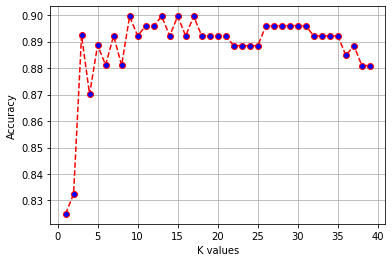

In [ ]:
plt.plot(range(1,40),accuracy,marker = 'o',linestyle = '--',color = 'red',markerfacecolor = 'blue')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(tx_train,y_train)

KNeighborsClassifier(n_neighbors=15)

**Predicting the Test set results**

In [ ]:
pred = knn.predict(tx_test)

**Making the Confusion Matrix**

In [ ]:
confusion_matrix(y_true = y_test,y_pred = pred)


array([[80,  8],
       [ 3, 41]])

In [ ]:
accuracy_score(y_test,pred)

0.9166666666666666